# Communities

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as colors


In [2]:
# Load data

edge_df = pd.read_csv("data/edges.csv", delimiter=",")
node_df = pd.read_csv("data/nodes.csv", delimiter=",")

G = nx.from_pandas_edgelist(edge_df, source="# source", target=" target", create_using=nx.Graph())

In [3]:
from networkx.algorithms.community import asyn_lpa_communities, label_propagation_communities

In [4]:
asyn_lpa_communities(G)

<generator object asyn_lpa_communities at 0x7fcb71d45f90>

In [5]:
largest_cc = max(nx.connected_components(G), key=len)
LG = G.subgraph(largest_cc)
partition_LG = asyn_lpa_communities(LG)
type(partition_LG)

nx.number_of_nodes(LG)
nx.number_of_edges(LG)

13428

In [6]:
partition = label_propagation_communities(LG)
len(partition)

625

Metagraph is a Graph with 63 nodes and 498 edges
100%|██████████| 63/63 [00:00<00:00, 64.29it/s]


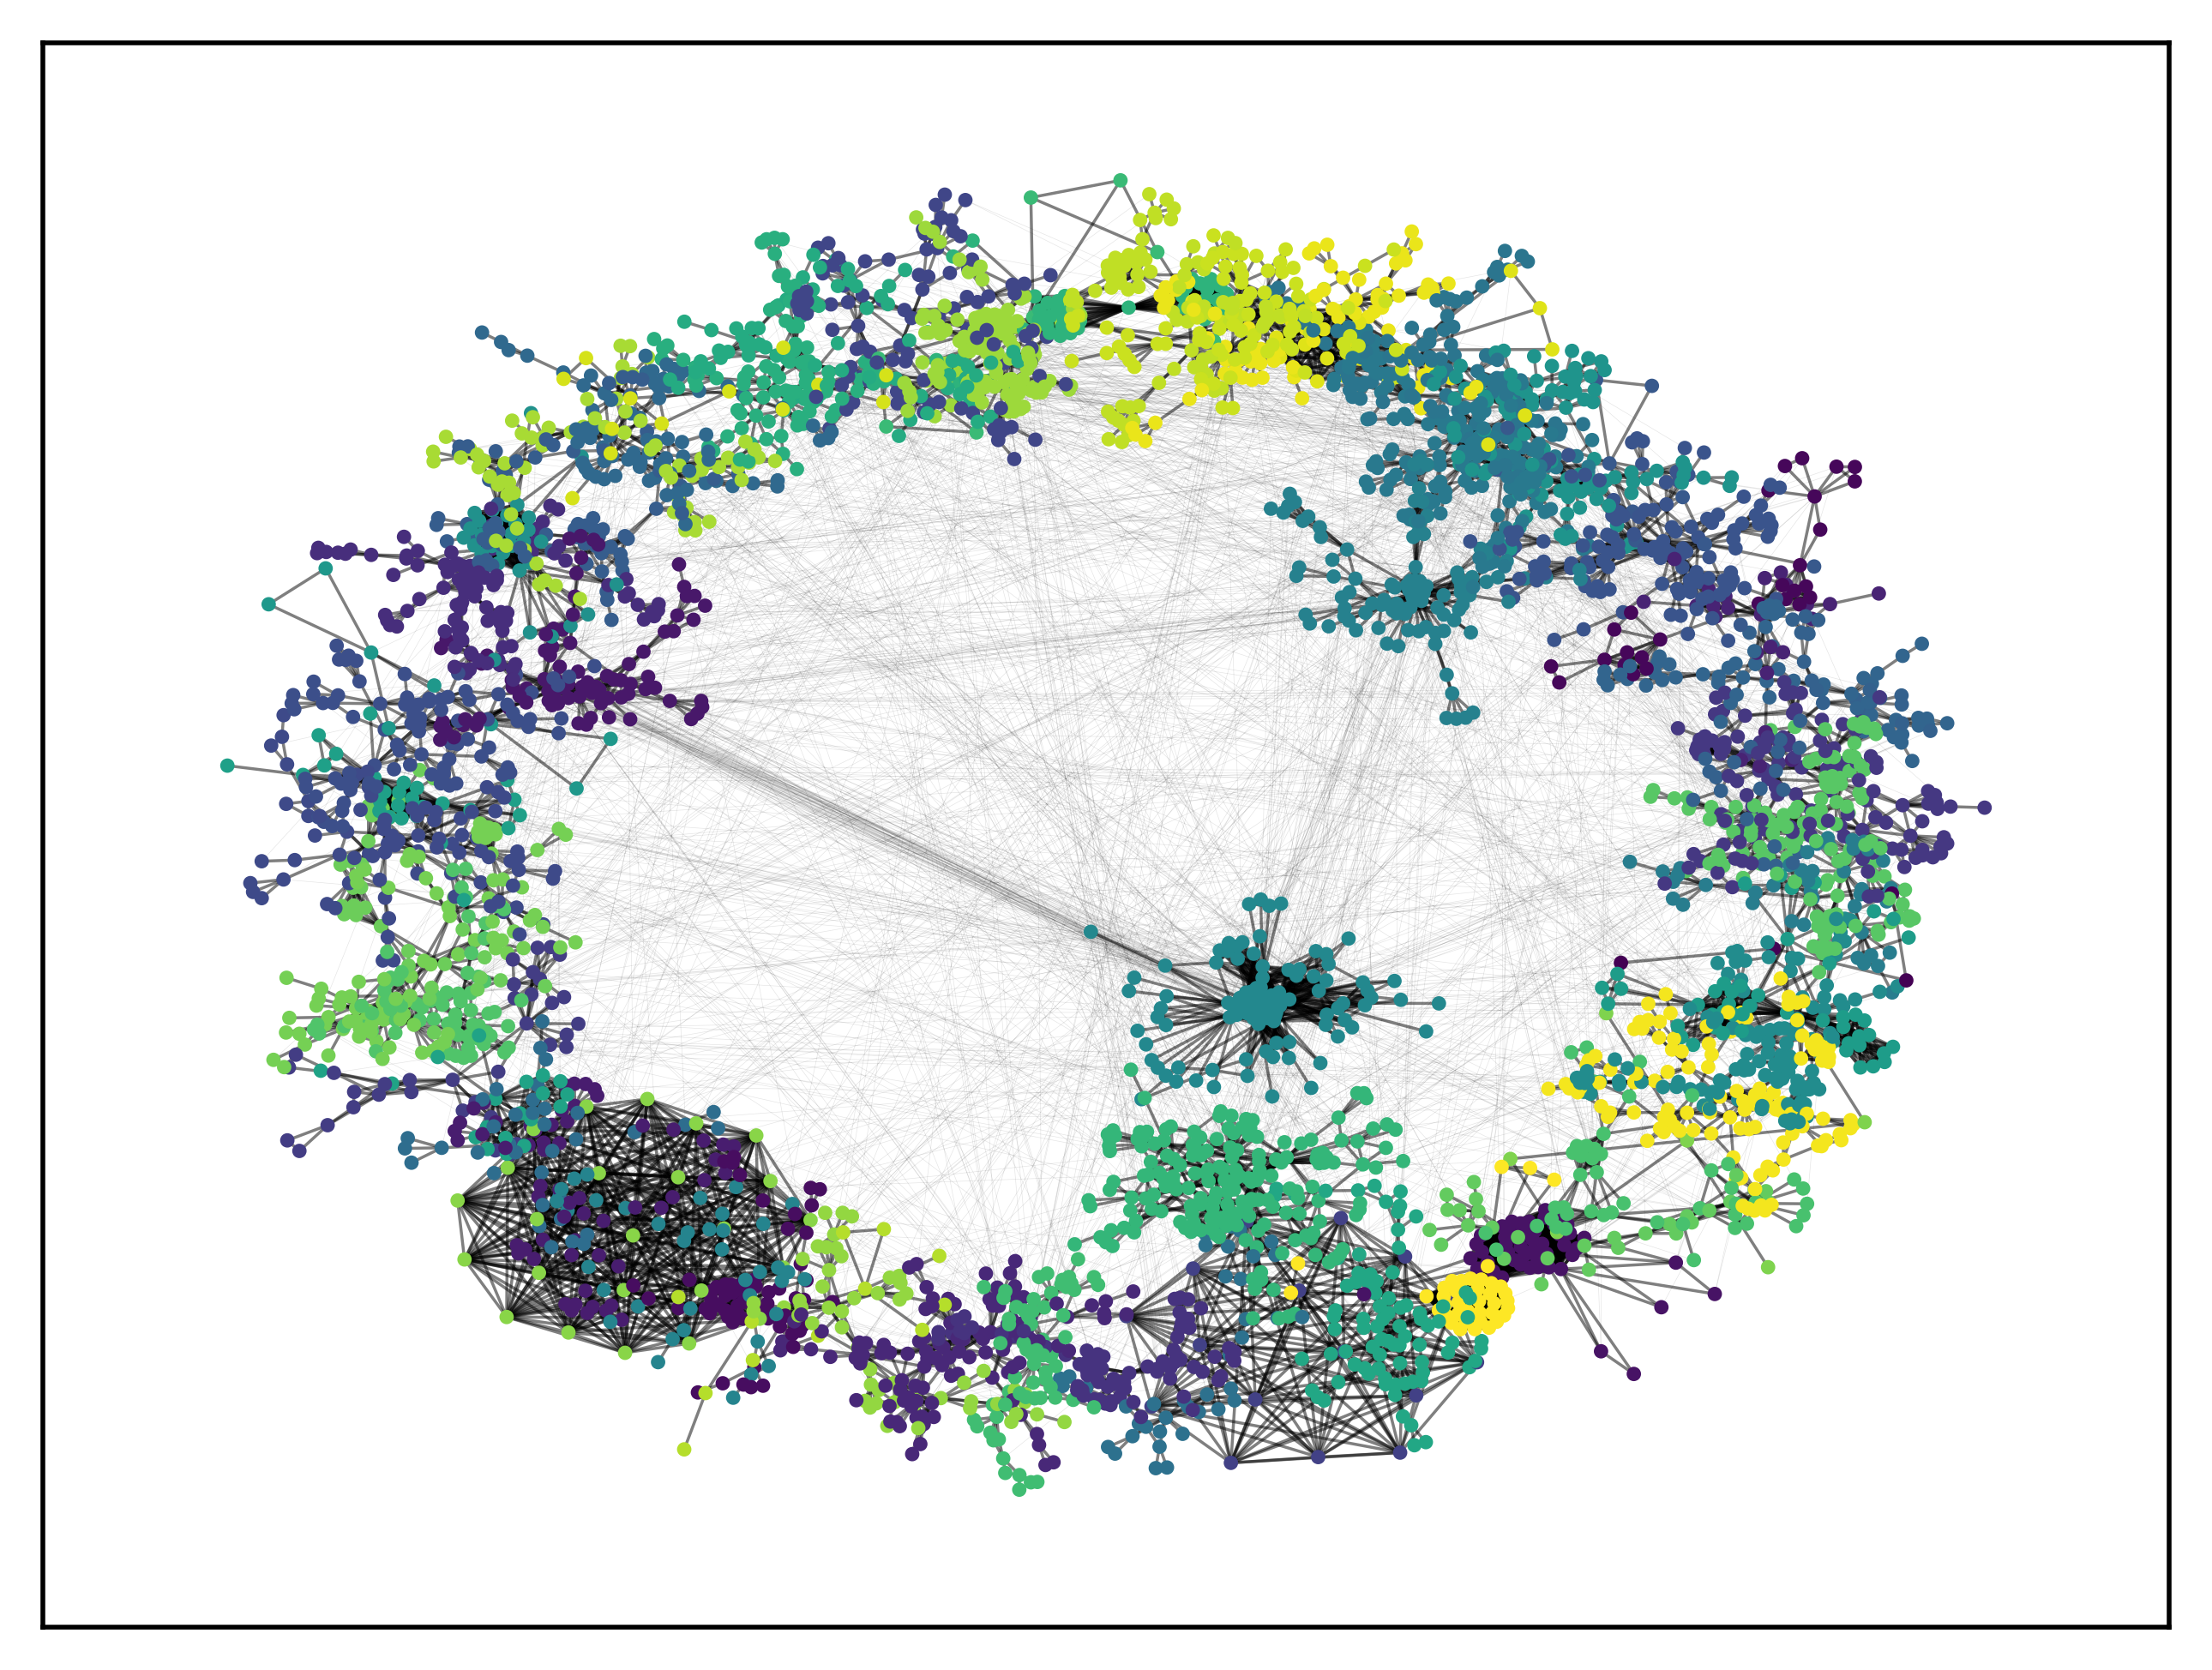

In [45]:
from scripts.layout_class import CommunityLayout
from networkx.algorithms import community

LG2 = nx.Graph(LG)
layout = CommunityLayout(LG2,
                community_compression = 0.25,
                layout_algorithm = nx.spring_layout,
                layout_kwargs = {"k":75, "iterations":1000},
                community_algorithm = community.louvain_communities,
                community_kwargs = {"resolution":2, "seed":None})
layout.display()


In [ ]:
from networkx.algorithms import community
len(list(community.asyn_lpa_communities(LG)))


663

In [ ]:
louvain = list(community.louvain_communities(LG, seed=10))
print(len(louvain))


41


In [ ]:
import numpy as np

lens = []
for i in louvain:
    lens.append(len(i))
print("smallest community: ", np.min(lens), "Largest community: ", np.max(lens))

smallest community:  7 Largest community:  234


Degree Assortativity

In [ ]:
#the average similarity of connections in the graph with respect to the node degree (how close high degree nodes are to each other, and low degree nodes are to each other)
d_a_c=nx.degree_assortativity_coefficient(LG)

#the average degree of the 'area' in which a certain node resides
a_n_d=nx.average_neighbor_degree(LG)

#How many edges do we need to remove to make the graph into two seperate graphs
a_d_c=nx.average_degree_connectivity(LG)

print(d_a_c)

0.6389971399620687


In [48]:
from IPython.display import SVG
import numpy as np
from sknetwork.visualization import svg_graph, svg_bigraph
from sknetwork.visualization import svg_dendrogram
from utils import plot_dendrogram


ImportError: cannot import name 'plot_dendrogram' from 'utils' (/opt/conda/lib/python3.8/site-packages/utils/__init__.py)

In [ ]:
#community.partition_at_level(dendrogram, level)

In [39]:
dendrogram = cm.generate_dendrogram(LG)
for level in range(len(dendrogram) - 1) :
    print("partition at level", level, "is", partition_at_level(dendrogram, level))

AttributeError: module 'community' has no attribute 'generate_dendrogram'

In [37]:
partition = cm.best_partition(G)

AttributeError: module 'community' has no attribute 'best_partition'

In [ ]:
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count += 1.
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
        nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20, node_color = str(count / size))
nx.draw_networkx_edges(G,pos, alpha=0.5)
plt.show()